In [196]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyCompare
from scipy.stats import zscore
import statsmodels.stats.weightstats as tests
from scipy import stats
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [197]:
df = pd.read_csv("data.csv")
type = "activity"
property = "caloriesBurned"
df.tail()

,bedtimeStart,Date,bedtimeEnd,Type,Provider,sleepScore,date,lightSleepDuration,sleepLatency,sleepEfficiency,...,remSleepDuration,CreatedAt,type,totalSleepDuration,averageHR,intenseActivity,caloriesBurned,steps,moderateActivity,softActivity
388,NaN,2024-03-22,NaN,activity_Withings,Withings,NaN,2024-03-22,NaN,NaN,NaN,...,NaN,1711322253,activity,NaN,NaN,0.0,426.860,6115.0,4740.0,960.0
389,NaN,2024-03-23,NaN,activity_Withings,Withings,NaN,2024-03-23,NaN,NaN,NaN,...,NaN,1711322255,activity,NaN,NaN,0.0,25.720,687.0,60.0,1080.0
390,NaN,2024-03-24,NaN,activity_Withings,Withings,NaN,2024-03-24,NaN,NaN,NaN,...,NaN,1711416912,activity,NaN,NaN,0.0,17.330,475.0,60.0,1080.0
391,NaN,2024-03-25,NaN,activity_Withings,Withings,NaN,2024-03-25,NaN,NaN,NaN,...,NaN,1711479655,activity,NaN,NaN,0.0,809.106,9690.0,8938.0,2880.0
392,NaN,2024-03-26,NaN,activity_Withings,Withings,NaN,2024-03-26,NaN,NaN,NaN,...,NaN,1711490235,activity,NaN,NaN,0.0,262.195,5173.0,2640.0,3000.0


In [198]:
categoriesSleep = ["sleepScore", "lightSleepDuration", "sleepLatency", "sleepEfficiency", "totalSleepDuration", "averageHR" ]
categoriesActivity = ["intenseActivity",
            "caloriesBurned", "steps", "moderateActivity", "softActivity"]
df_oura = df.loc[df["Type"] == f"sleep_Oura"]
df_withings = df.loc[df["Type"] == f"sleep_Withings"]
df_oura = df_oura[df_oura["date"].isin(df_withings["date"])]
# df_oura = df_oura[df_oura[property].notna()]
df_withings = df_withings[df_withings["date"].isin(df_oura["date"])]
# df_withings = df_withings[df_withings[property].notna()]
df_oura.set_index('date', inplace=True)
df_withings.set_index('date', inplace=True)
resultSleep = df_oura[categoriesSleep].sub(df_withings[categoriesSleep])
df_oura = df.loc[df["Type"] == f"activity_Oura"]
df_withings = df.loc[df["Type"] == f"activity_Withings"]
df_oura = df_oura[df_oura["date"].isin(df_withings["date"])]
# df_oura = df_oura[df_oura[property].notna()]
df_withings = df_withings[df_withings["date"].isin(df_oura["date"])]
# df_withings = df_withings[df_withings[property].notna()]
df_oura.set_index('date', inplace=True)
df_withings.set_index('date', inplace=True)
resultActivity = df_oura[categoriesActivity].sub(df_withings[categoriesActivity])
print(len(resultSleep))
print(len(resultActivity))

59
66


In [199]:
import math
Q = 0
N = 0
a_lst = []
b_lst = []
for p in categoriesSleep:
    
    df_oura = df.loc[df["Type"] == f"sleep_Oura"]
    df_withings = df.loc[df["Type"] == f"sleep_Withings"]
    df_oura = df_oura[df_oura["date"].isin(df_withings["date"])]
    df_withings = df_withings[df_withings["date"].isin(df_oura["date"])]
    df_oura.reset_index(inplace=True)
    df_withings.reset_index(inplace=True)
    zscores = zscore(resultSleep[p]).values

    for i, row in df_oura.iterrows():
        a = row[p]
        b = df_withings.loc[df_withings["date"] == row["date"]]
        b = b.iloc[0][p]
        if (min(b, a) == 0) or math.isnan(a) or math.isnan(b):
            continue
        temp = zscores[i]
        if (abs(temp) >= 2.5):
            continue
        N += 1
        val = (max(b, a) / min(b, a) % 1)
        if (a >= b):
            a_lst.append(max(b, a) / min(b, a))
            b_lst.append(1)
        else:
            a_lst.append(1)
            b_lst.append(max(b, a) / min(b, a))

        Q += val

for p in categoriesActivity:
    df_oura = df.loc[df["Type"] == f"activity_Oura"]
    df_withings = df.loc[df["Type"] == f"activity_Withings"]
    df_oura = df_oura[df_oura["date"].isin(df_withings["date"])]
    df_withings = df_withings[df_withings["date"].isin(df_oura["date"])]
    df_oura.reset_index(inplace=True)
    df_withings.reset_index(inplace=True)
    zscores = zscore(resultActivity[p]).values
    for i, row in df_oura.iterrows():
        row = row.to_dict()
        a = row[p]
        b = df_withings.loc[df_withings["date"] == row["date"]]
        b = b.iloc[0][p]
        if (min(b, a) == 0) or math.isnan(a) or math.isnan(b):
            continue
        temp = zscores[i]
        if (abs(temp) >= 2.5):
            continue
        N += 1
        val = (max(b, a) / min(b, a) % 1)
        if (a >= b):
            a_lst.append(max(b, a) / min(b, a))
            b_lst.append(1)
        else:
            a_lst.append(1)
            b_lst.append(max(b, a) / min(b, a))
        Q += val

print(Q / N)
a_lst = np.asarray(a_lst, dtype=np.float32)
b_lst = np.asarray(b_lst, dtype=np.float32)

0.267673527951078


In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pdb
from numpy.random import random

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='black', linestyle='-')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.xlabel("Means")
    plt.ylabel("Difference")
    plt.ylim(md - 3.5*sd, md + 3.5*sd)

    xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

    plt.text(xOutPlot, md - 1.96*sd, 
        r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
        ha = "center",
        va = "center",
        )
    plt.text(xOutPlot, md + 1.96*sd, 
        r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
        ha = "center",
        va = "center",
        )
    plt.text(xOutPlot, md, 
        r'Mean:' + "\n" + "%.2f" % md, 
        ha = "center",
        va = "center",
        )
    plt.subplots_adjust(right=0.85)



In [201]:
df_oura = df.loc[df["Type"] == f"{type}_Oura"]
df_withings = df.loc[df["Type"] == f"{type}_Withings"]
df_oura = df_oura[df_oura["date"].isin(df_withings["date"])]
df_oura = df_oura[df_oura[property].notna()]
df_withings = df_withings[df_withings["date"].isin(df_oura["date"])]
df_withings = df_withings[df_withings[property].notna()]

[ 583.225    6.8    160.627  590.135    7.797  931.052  203.447  279.56
  198.02    88.47   224.769  695.345  191.17   487.465  292.985  178.35
    8.957  203.658  934.867  279.88    14.92   219.939   10.569  637.537
  218.795  187.824  764.877   18.06   166.596 1146.307  582.584  190.3
  282.381  244.463  857.346  244.83   193.408  215.174  285.748  256.027
  275.028  189.77     8.748  268.86   326.91   290.608  341.78  1171.08
  293.522  280.68   166.706  272.587  275.854  389.395  322.021  811.014
  220.62   451.447  214.398  769.589  313.94   426.86    25.72    17.33
  809.106  262.195]


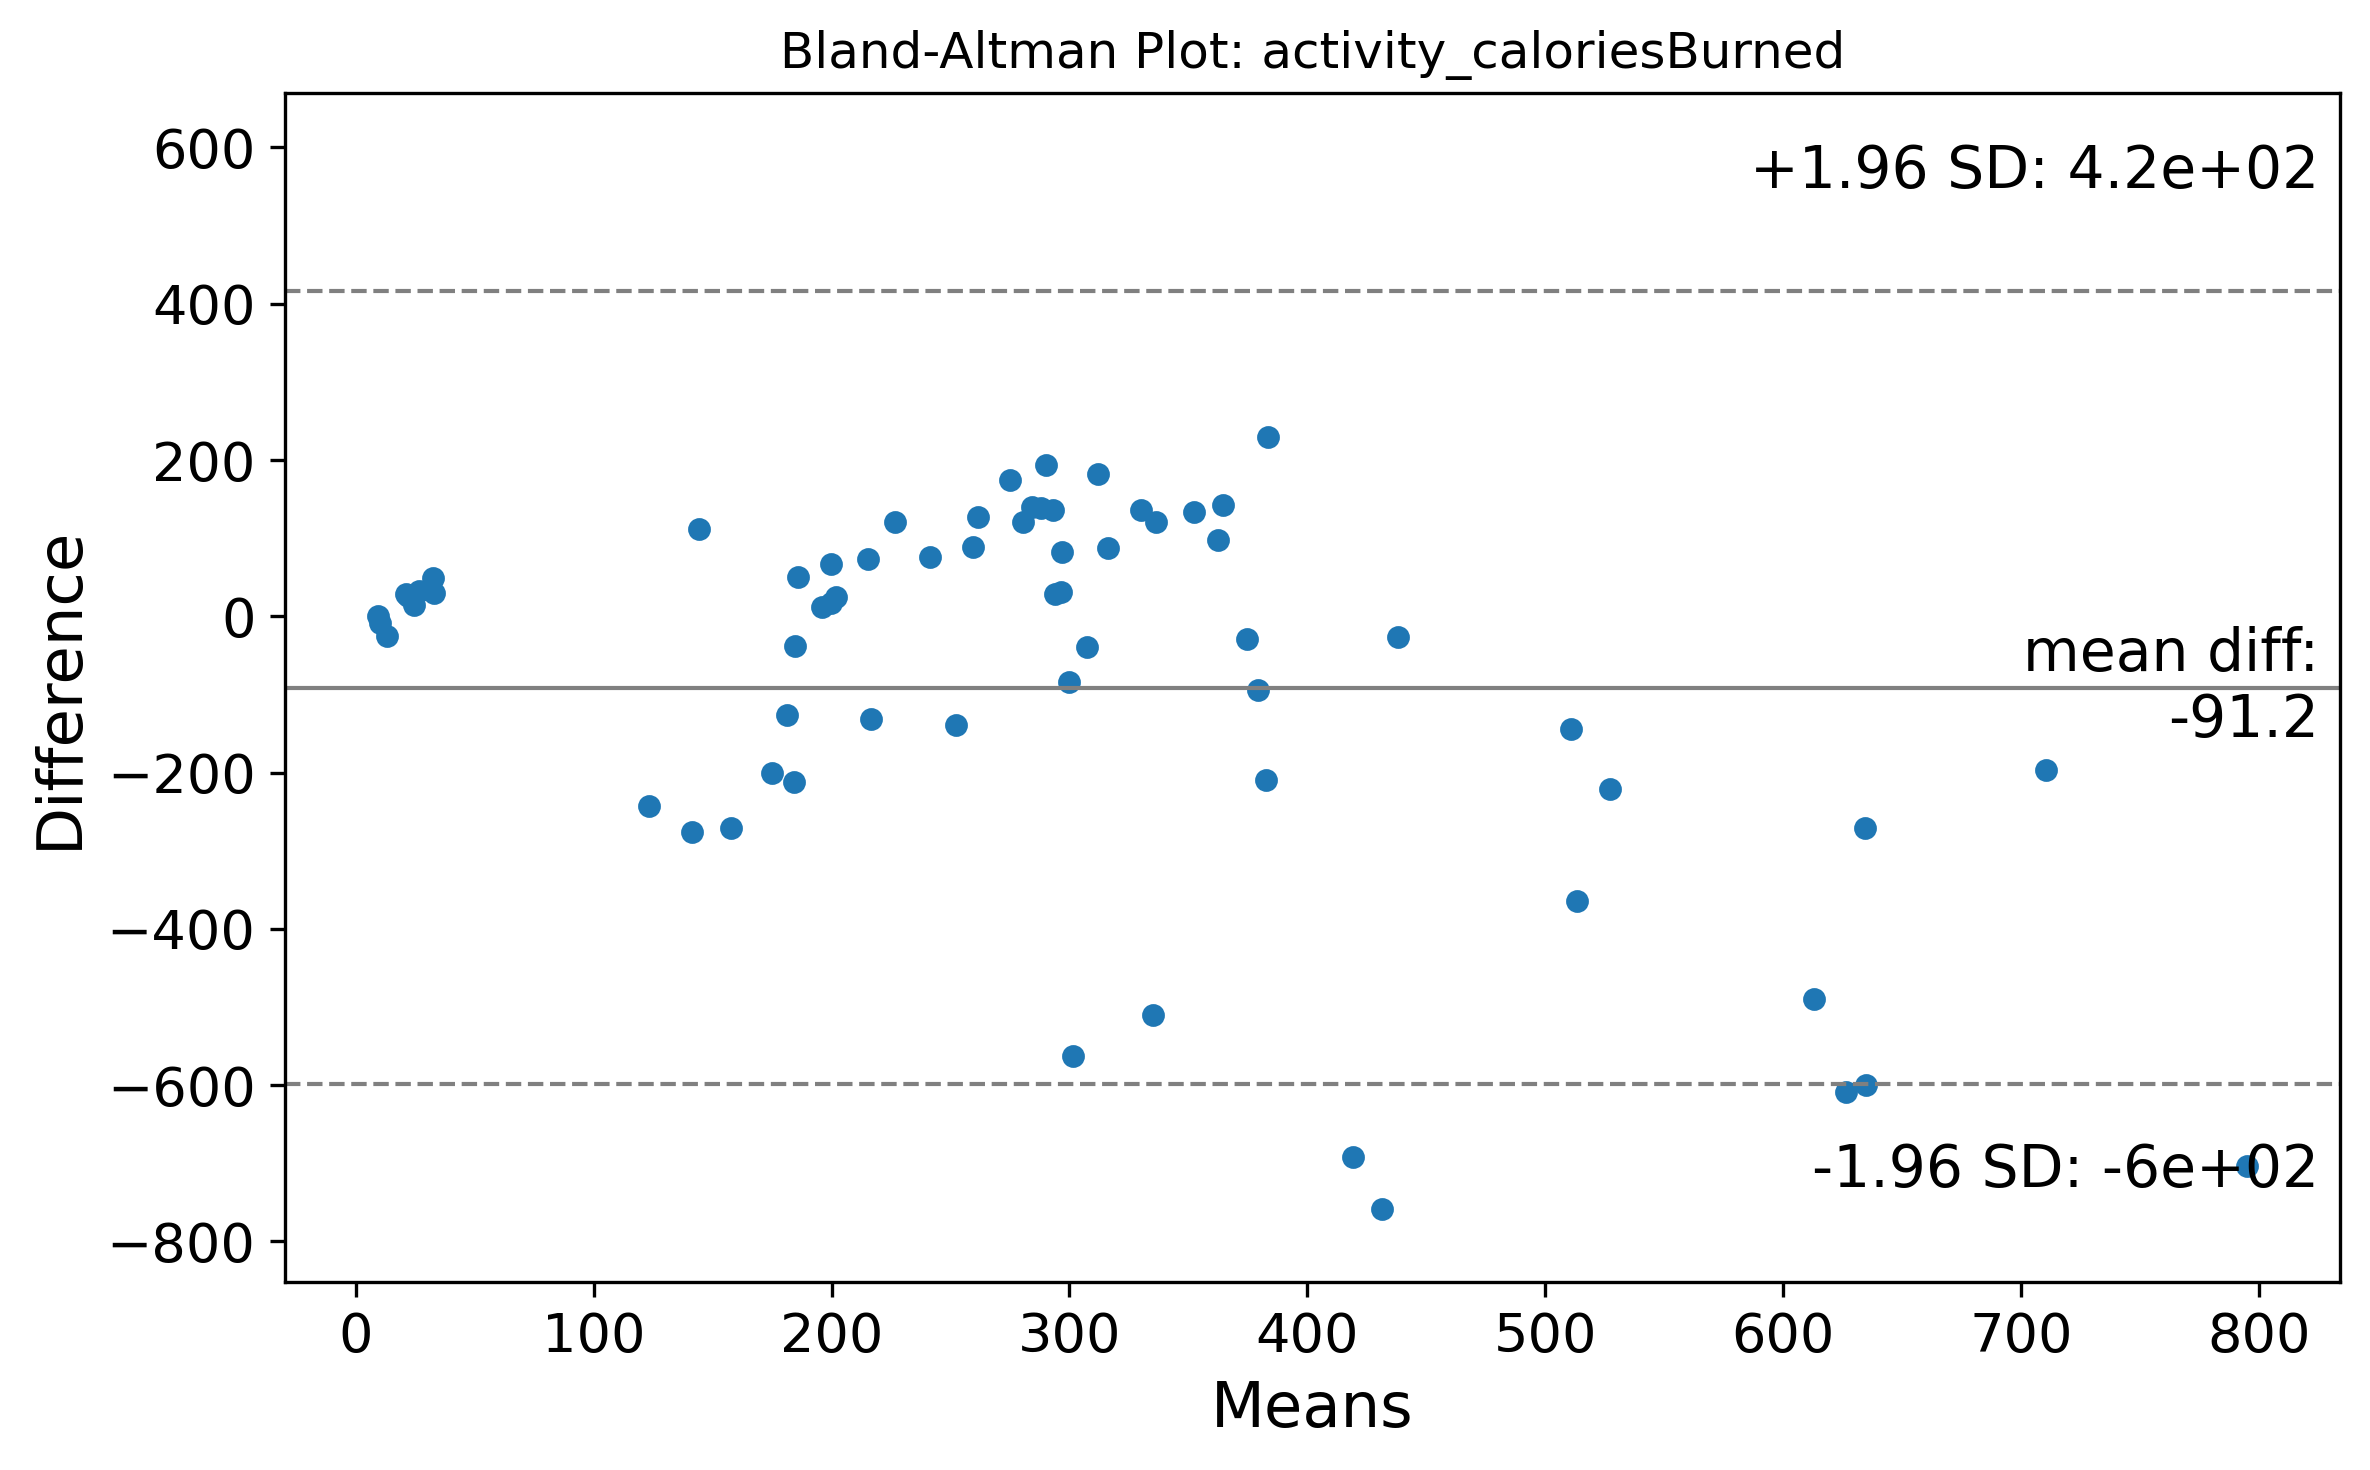

In [202]:

a = df_oura[property].values
b = df_withings[property].values
print(df_withings[property].values)
f, ax = plt.subplots(1, figsize = (8, 5))
plt.title(f"Bland-Altman Plot: {type}_{property}")
sm.graphics.mean_diff_plot(a, b, ax=ax)
plt.show()

sleepScore: 7.262238548274647e-17
sleepScore: 1.0399999999999998, 23.121428571428567
lightSleepDuration: 1.7224464294141753e-10
lightSleepDuration: 1.0599999999999994, 2877.3151724137915
sleepLatency: 3.26987516743905e-07
sleepLatency: 0.9950000000000008, 370.7684210526319
sleepEfficiency: 2.591717072733447e-20
sleepEfficiency: 1.1099999999999983, 7.214999999999989
totalSleepDuration: 0.014733396907999739
totalSleepDuration: 0.8950000000000007, 27.551960784313746
averageHR: 2.2098199731855853e-10
averageHR: 1.0849999999999989, 2.4325930851063804
intenseActivity: 0.003173748838439193
intenseActivity: 1.214999999999996, 765.5078571428546
caloriesBurned: 0.020119303714832223
caloriesBurned: 0.7050000000000005, 117.20312156250009
steps: 0.6204135215590747
steps: 0.42500000000000027, 353.01309523809545
moderateActivity: 1.0079120885235395e-05
moderateActivity: 1.124999999999998, 867.5507812499984
softActivity: 2.388894919884111e-06
softActivity: 0.9100000000000007, 1361.6820000000012


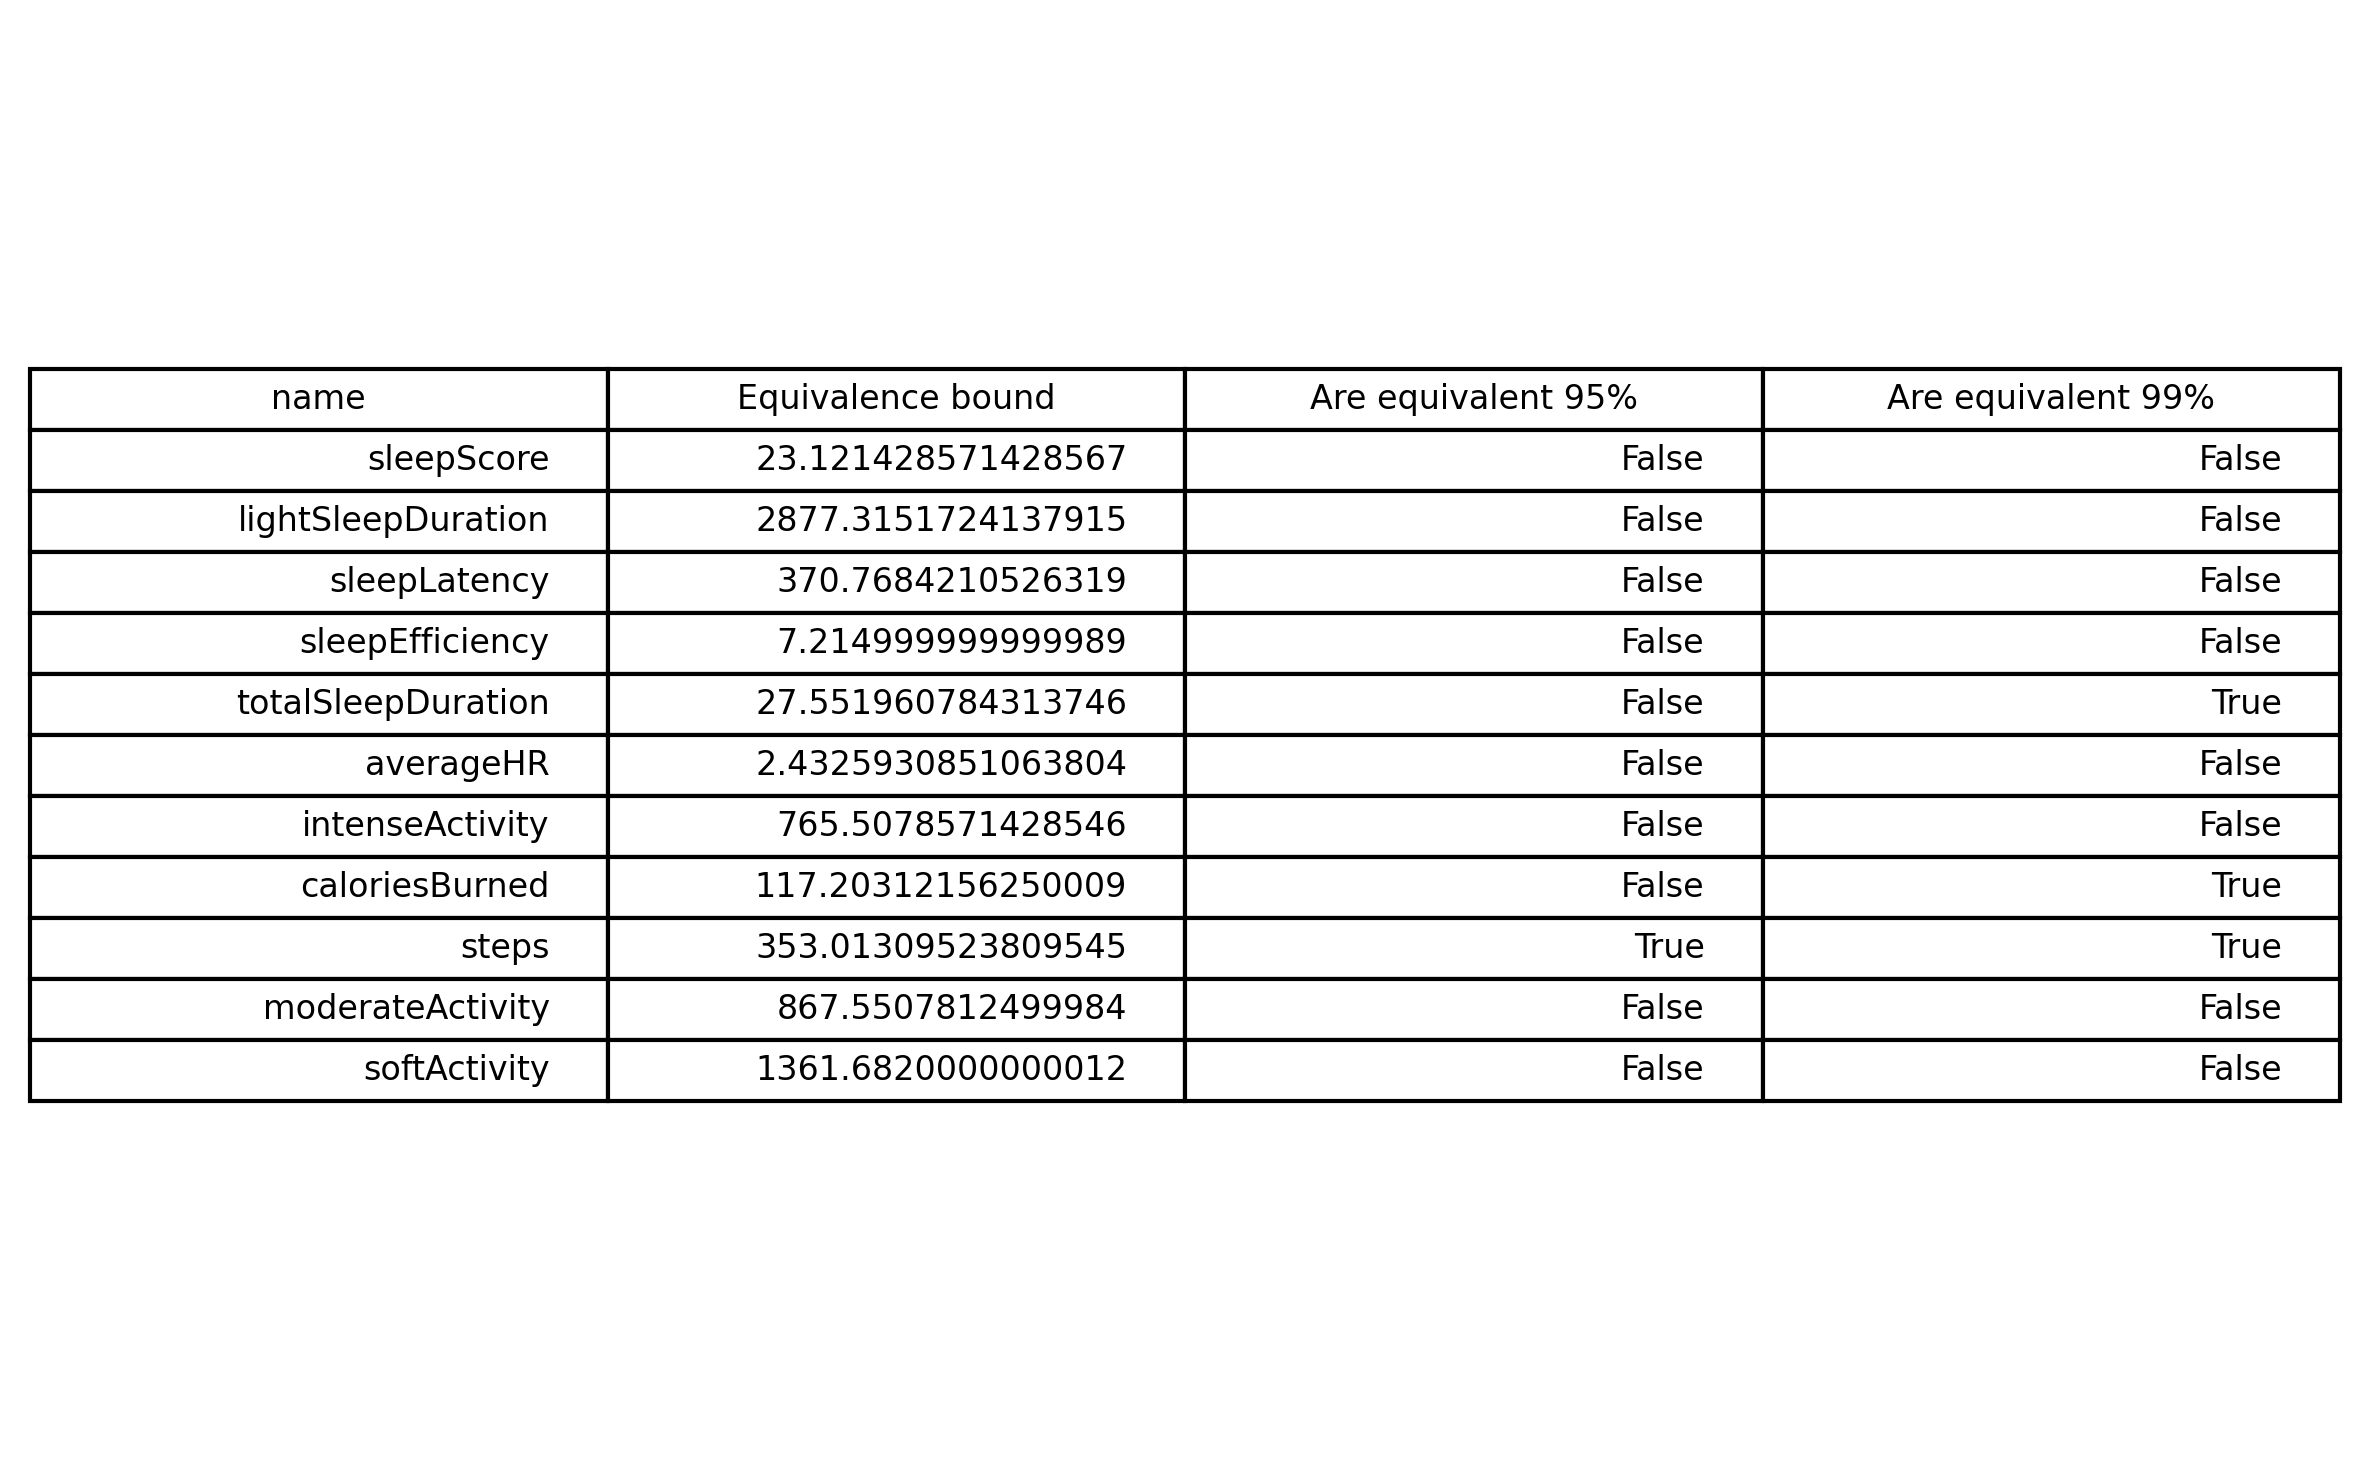

In [203]:
confidence = 0.05
increment = 0.005
margin = 0
table_df = []
zscoreOutlier = 2.5
for p in categoriesSleep:
    
    df_oura = df.loc[df["Type"] == f"sleep_Oura"]
    df_withings = df.loc[df["Type"] == f"sleep_Withings"]
    df_oura = df_oura[df_oura["date"].isin(df_withings["date"])]
    df_oura = df_oura[df_oura[p].notna()]
    df_withings = df_withings[df_withings["date"].isin(df_oura["date"])]
    df_withings = df_withings[df_withings[p].notna()]
    df_oura.set_index('date', inplace=True)
    df_withings.set_index('date', inplace=True)

    zscores = np.abs(zscore(resultSleep[resultSleep[p].notna()][p]))
    df_oura["zscores"] = zscores
    df_withings["zscores"] = zscores
    x = 0
    a = df_oura[df_oura["zscores"] <= zscoreOutlier][p].values
    b = df_withings[df_withings["zscores"] <= zscoreOutlier][p].values
    p_two = stats.ttest_rel(a, b).pvalue
    is_in = p_two <= confidence
    is_in95 = p_two <= 0.05
    is_in99 = p_two <= 0.01
    print(f"{p}: {p_two}")
    while True:
        
        margin = np.mean(np.abs(a - b)) * x
        p_val = tests.ttost_paired(a, b, -margin, margin)[0]
        
        if p_val >= confidence:
            x += increment
            continue
        print(f"{p}: {x}, {margin}")
        table_df.append([p, margin, not is_in95, not is_in99])
        break

for p in categoriesActivity:
    df_oura = df.loc[df["Type"] == f"activity_Oura"]
    df_withings = df.loc[df["Type"] == f"activity_Withings"]
    df_oura = df_oura[df_oura["date"].isin(df_withings["date"])]
    df_oura = df_oura[df_oura[p].notna()]
    df_withings = df_withings[df_withings["date"].isin(df_oura["date"])]
    df_withings = df_withings[df_withings[p].notna()]
    df_oura.set_index('date', inplace=True)
    df_withings.set_index('date', inplace=True)

    x = 0
    zscores = np.abs(zscore(resultActivity[p]))
    df_oura["zscores"] = zscores
    df_withings["zscores"] = zscores
    a = df_oura[df_oura["zscores"] <= zscoreOutlier][p].values
    b = df_withings[df_withings["zscores"] <= zscoreOutlier][p].values
    p_two = stats.ttest_rel(a, b).pvalue
    is_in95 = p_two <= 0.05
    is_in99 = p_two <= 0.01
    print(f"{p}: {p_two}")
    while True:
        
        margin = np.mean(np.abs(a - b)) * x
        p_val = tests.ttost_paired(a, b, -margin, margin)[0]
        if p_val >= confidence:
            x += increment
            continue
        print(f"{p}: {x}, {margin}")
        table_df.append([p, margin, not is_in95, not is_in99])
        break
table_df = pd.DataFrame(table_df)
table_df.head()
fig, ax = plt.subplots(figsize = (8, 5))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=table_df.values, colLabels=["name", "Equivalence bound", "Are equivalent 95%", "Are equivalent 99%"], loc='center')
fig.tight_layout()

plt.show()
